<a href="https://colab.research.google.com/github/johnreyes96/artificial-vision/blob/master/src/main/python/classes/OperationsMotionDetectionThresholdImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar numpy para dar soporte a:
# Concatenación de matrices - np.concatenate
import numpy as np

# Importar el módulo cv2 de la librería opencv
import cv2
from google.colab.patches import cv2_imshow

# Soporte para visualización.
import matplotlib.pyplot as plt

(a.) Muestre que la resta de dos imáges es útil para detectar zonas donde dos imágenes de igual tamaño varía. Ejemplo: detección de movimiento.

NOTA: Region-Of-Interest (ROI)

max(I) - I

escalar - Matriz

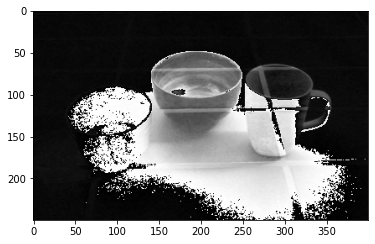

In [ ]:
# Se debe conectar con el Drive, y luego buscar la ruta correcta para leer la imagen
im_A = cv2.imread('/content/drive/MyDrive/vision_artificial/images/sub_A.png', cv2.IMREAD_GRAYSCALE)
im_B = cv2.imread('/content/drive/MyDrive/vision_artificial/images/sub_B.png', cv2.IMREAD_GRAYSCALE)

resta = im_A - im_B 
plotResta = plt.imshow(resta, cmap="gray")

(b.) Muestre que se pueden visibilizar algunos detalles en una imagen de poco brillo, utilizando las operaciones aritméticas suma y multiplicación. Mencione ventajas y desventajas de cada enfoque. Un enfoque más elaborado sería utilizar por ejemplo Ley de la Potencia (Power Law).

Desventajas:
(1.) Ambos enfoques son globales; NO SON ADAPTATIVOS.
(2.) La multiplicación tiende a saturar la imagen, en mayor medida que la suma.
(3.) Debe especificarse criterio para seleccionar la constante en ambos enfoques. En caso contrario, dicha selección es arbitraria.

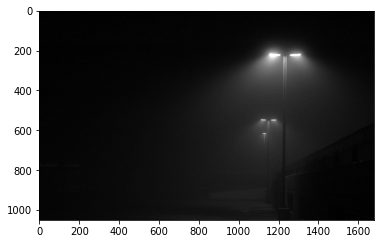

In [ ]:
lowBrightnessIm = cv2.imread('/content/drive/MyDrive/vision_artificial/images/D1.jpg', cv2.IMREAD_GRAYSCALE)
# lowBrightnessIm = lowBrightnessIm + 64
lowBrightnessIm = cv2.add(lowBrightnessIm, 64)
minimo = lowBrightnessIm.min()
plotLB = plt.imshow(lowBrightnessIm, cmap="gray")
del lowBrightnessIm

(c.) Respecto al literal (b.), muestre que los operadores resta y división tienen un efecto contrario a los operadores suma y multiplicación.

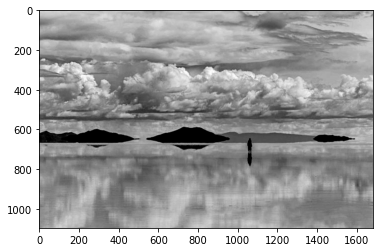

In [ ]:
highBrightnessIm = cv2.imread('/content/drive/MyDrive/vision_artificial/images/Brighten.jpg', cv2.IMREAD_GRAYSCALE)
scalar = 64
# highBrightnessIm = highBrightnessIm - 64
highBrightnessIm = cv2.subtract(highBrightnessIm, scalar)
plotHB = plt.imshow(highBrightnessIm, cmap="gray")

(d.) Utilice umbralización y operaciones lógicas, para detectar movimiento.

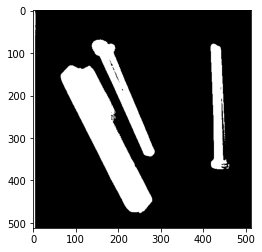

In [ ]:
# Se debe conectar con el Drive, y luego buscar la ruta correcta para leer la imagen
im_A = cv2.imread('/content/drive/MyDrive/vision_artificial/images/scr3.png', cv2.IMREAD_GRAYSCALE)
im_B = cv2.imread('/content/drive/MyDrive/vision_artificial/images/scr4.png', cv2.IMREAD_GRAYSCALE)

k = 0.5
thr = 170

im_A[im_A <= thr] = 1
im_A[im_A > thr] = 0
im_B[im_B <= thr] = 1
im_B[im_B > thr] = 0

# Implements XOR operator
im_A = (k * im_A) + ((1 - k) * im_B)
im_A[im_A <= 0] = 0
im_A[im_A > 0] = 1

imgplotD = plt.imshow(im_A, cmap="gray")
# Operadores lógicos: OR, AND, NOT, NAND, XOR, XNOR

(e.) Utilice el operador umbral para hallar el valor promedio de los píxeles en la ROI que encierra el craneo en la imagen Brain2.jpg. Compare el resultado con el obtenido en ausencia de umbralización. Para hallar los píxeles que encierran la ROI, considere la función np.where.

59.91876729329427
95.34179605436726


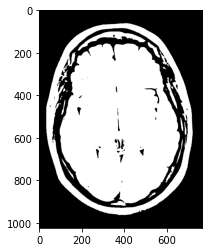

In [ ]:
brainIm = cv2.imread('/content/drive/MyDrive/VAI92/Brain2.jpg', cv2.IMREAD_GRAYSCALE)
brainImPlot  = plt.imshow(brainIm , cmap="gray")
